In [11]:
# Generating a toy dataset.
# DO NOT MODIFY THIS PART

import numpy as np
import math
import random as rand

paras = list((rand.random() - 0.5 for _ in range(13)))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def y_gen(x):
    h_11 = sigmoid(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = sigmoid(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_13 = sigmoid(paras[6] * x[0] + paras[7] * x[1] + paras[8])
    h_21 = sigmoid(paras[9] * h_11 + paras[10] * h_12 + paras[11] * h_13 + paras[12])
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

from sklearn.model_selection import train_test_split

r = 0.2
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=r)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=r)

Epoch 0: Train Loss = 0.03200141136362563, Valid Loss = 0.036289484413355395
Epoch 100: Train Loss = 0.03190077384341265, Valid Loss = 0.03633161659988852
Epoch 200: Train Loss = 0.031847416833796556, Valid Loss = 0.0362650033568839
Epoch 300: Train Loss = 0.031759234747542255, Valid Loss = 0.036154758682044326
Epoch 400: Train Loss = 0.03160094707447512, Valid Loss = 0.03595812833216871
Epoch 500: Train Loss = 0.03131327981724658, Valid Loss = 0.03560295762614837
Epoch 600: Train Loss = 0.030803328972864707, Valid Loss = 0.03497484705076608
Epoch 700: Train Loss = 0.029951592744035378, Valid Loss = 0.03392179111042493
Epoch 800: Train Loss = 0.028672412565446875, Valid Loss = 0.03231875775596191
Epoch 900: Train Loss = 0.02704832930647802, Valid Loss = 0.030222944109392785


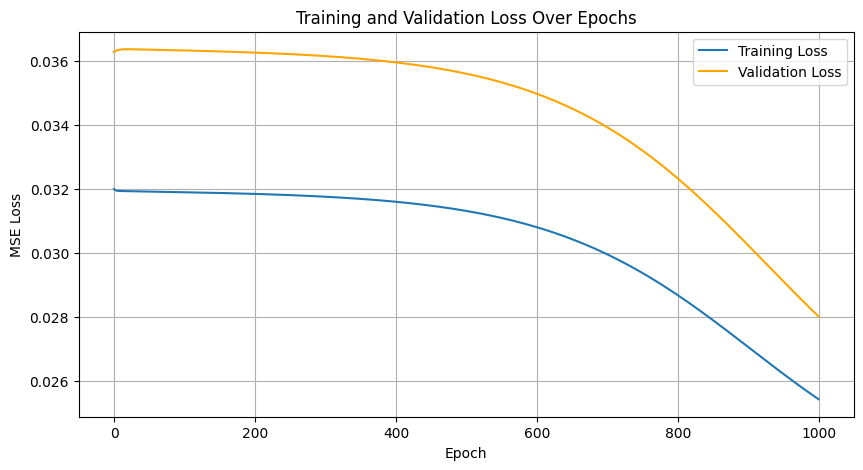

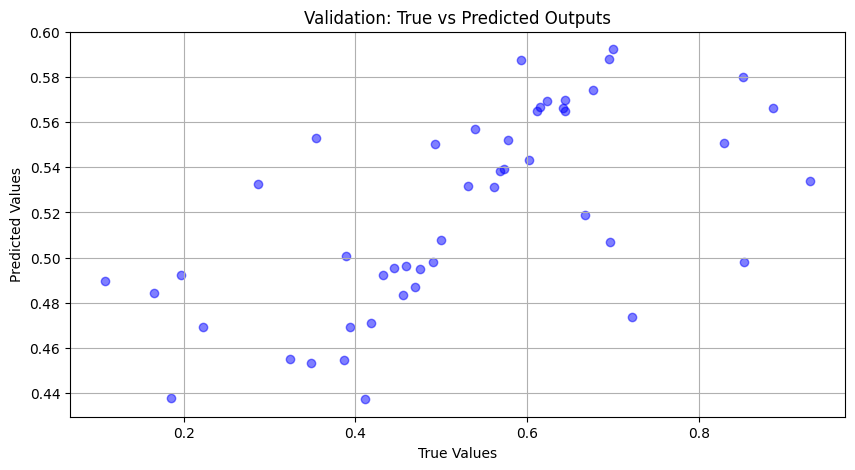

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize parameters for a two-layer network
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)  # Seed for reproducibility
    W1 = np.random.randn(input_size, hidden_size) * 0.1
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.1
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2
def update_learning_rate(initial_lr, epoch, decay_rate=0.1):
    return initial_lr / (1 + decay_rate * epoch)

# Forward propagation through the network
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

# Compute the MSE loss
def compute_mse(A2, Y):
    return np.mean((A2 - Y)**2)

# Backward propagation to compute gradients
def backward_propagation(X, Y, Z1, A1, Z2, A2, W2):
    m = X.shape[0]
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

# Update network parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Convert lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train).reshape(-1, 1)  # Reshape to (n_samples, 1)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid).reshape(-1, 1)

# Initialize parameters
input_size = 2
hidden_size = 3
output_size = 1
W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

# Training settings
epochs = 1000
learning_rate = 0.5
train_losses = []
valid_losses = []

for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(x_train, W1, b1, W2, b2)
    train_loss = compute_mse(A2, y_train)
    train_losses.append(train_loss)

    _, _, _, A2_valid = forward_propagation(x_valid, W1, b1, W2, b2)
    valid_loss = compute_mse(A2_valid, y_valid)
    valid_losses.append(valid_loss)

    dW1, db1, dW2, db2 = backward_propagation(x_train, y_train, Z1, A1, Z2, A2, W2)
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Train Loss = {train_loss}, Valid Loss = {valid_loss}')

# Plotting training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting true vs. predicted outputs
plt.figure(figsize=(10, 5))
plt.scatter(y_valid, A2_valid, alpha=0.5, color='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Validation: True vs Predicted Outputs')
plt.grid(True)
plt.show()


MSE Loss on Test Set: 0.016301458337416384


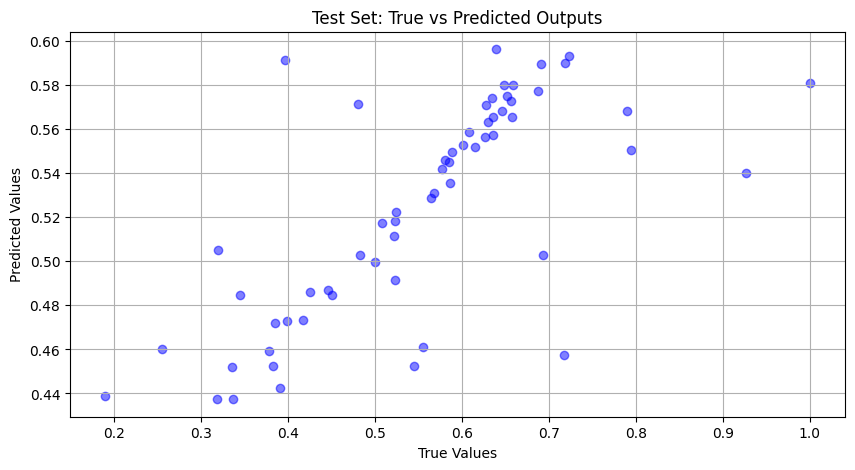

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return A2

def compute_mse(predictions, labels):
    return np.mean((predictions - labels) ** 2)

# Assuming x_test and y_test are already prepared and appropriately formatted
x_test = np.array(x_test)
y_test = np.array(y_test).reshape(-1, 1)  # Make sure y_test is correctly shaped

# Forward propagate the test data
A2_test = forward_propagation(x_test, W1, b1, W2, b2)

# Calculate the MSE on the test data
test_loss = compute_mse(A2_test, y_test)
print("MSE Loss on Test Set:", test_loss)

# Plotting true vs. predicted outputs for the test set
plt.figure(figsize=(10, 5))
plt.scatter(y_test, A2_test, alpha=0.5, color='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: True vs Predicted Outputs')
plt.grid(True)
plt.show()

In [14]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [15]:
import numpy as np
def initialize_parameters():
    np.random.seed(42)  # For reproducibility
    W1 = np.random.randn(2, 3) * 0.1
    b1 = np.zeros((1, 3))
    W2 = np.random.randn(3, 1) * 0.1
    b2 = np.zeros((1, 1))
    return W1, b1, W2, b2

In [16]:
# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return A1, A2

In [17]:
# Compute MSE loss
def compute_mse(A2, Y):
    return np.mean((A2 - Y)**2) / 2

In [18]:
def backward_propagation(X, Y, A1, A2, W2):
    m = X.shape[0]
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    print(f"Shape of dZ2: {dZ2.shape}")
    print(f"Shape of W2.T: {W2.T.shape}")
    print(f"Shape of A1: {A1.shape}")
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

In [19]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

Shape of dZ2: (192, 1)
Shape of W2.T: (1, 3)
Shape of A1: (192, 3)
Epoch 0: Train Loss = 0.016000705681812815, Valid Loss = 0.018145430489617472
Shape of dZ2: (192, 1)
Shape of W2.T: (1, 3)
Shape of A1: (192, 3)
Shape of dZ2: (192, 1)
Shape of W2.T: (1, 3)
Shape of A1: (192, 3)
Shape of dZ2: (192, 1)
Shape of W2.T: (1, 3)
Shape of A1: (192, 3)
Shape of dZ2: (192, 1)
Shape of W2.T: (1, 3)
Shape of A1: (192, 3)
Shape of dZ2: (192, 1)
Shape of W2.T: (1, 3)
Shape of A1: (192, 3)
Shape of dZ2: (192, 1)
Shape of W2.T: (1, 3)
Shape of A1: (192, 3)
Shape of dZ2: (192, 1)
Shape of W2.T: (1, 3)
Shape of A1: (192, 3)
Shape of dZ2: (192, 1)
Shape of W2.T: (1, 3)
Shape of A1: (192, 3)
Shape of dZ2: (192, 1)
Shape of W2.T: (1, 3)
Shape of A1: (192, 3)
Shape of dZ2: (192, 1)
Shape of W2.T: (1, 3)
Shape of A1: (192, 3)
Shape of dZ2: (192, 1)
Shape of W2.T: (1, 3)
Shape of A1: (192, 3)
Shape of dZ2: (192, 1)
Shape of W2.T: (1, 3)
Shape of A1: (192, 3)
Shape of dZ2: (192, 1)
Shape of W2.T: (1, 3)
Shape 

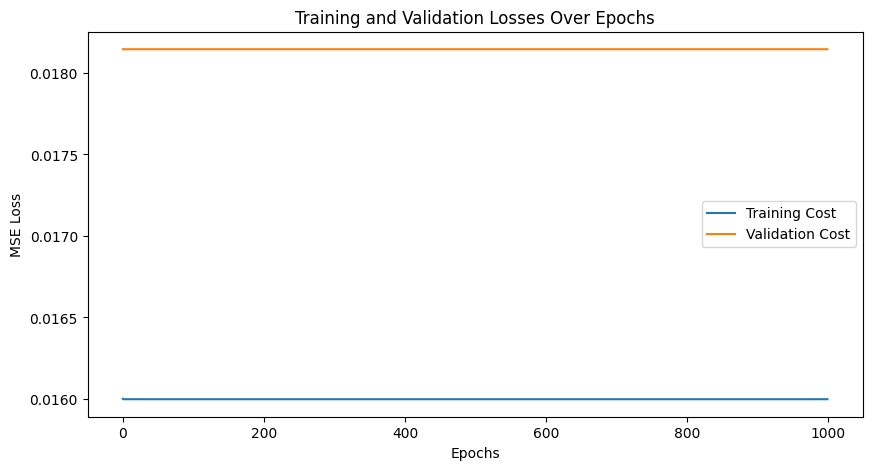

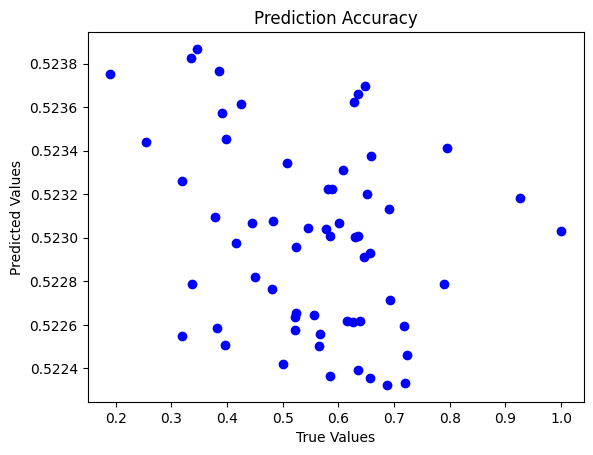

In [20]:
import matplotlib.pyplot as plt


# Training the model
W1, b1, W2, b2 = initialize_parameters()
learning_rate = 0.1
epochs = 1000
train_costs = []
valid_costs = []

for epoch in range(epochs):
    # Training loop
    A1, A2 = forward_propagation(x_train, W1, b1, W2, b2)
    train_loss = compute_mse(A2, y_train)
    dW1, db1, dW2, db2 = backward_propagation(x_train, y_train, A1, A2, W2)
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    train_costs.append(train_loss)
    
    # Validation
    _, A2_valid = forward_propagation(x_valid, W1, b1, W2, b2)
    valid_loss = compute_mse(A2_valid, y_valid)
    valid_costs.append(valid_loss)
    
    # Adjust learning rate if necessary (example: simple decay)
    learning_rate *= 0.01
    
    # Logging
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss}, Valid Loss = {valid_loss}")

# Plot training and validation costs
plt.figure(figsize=(10, 5))
plt.plot(train_costs, label='Training Cost')
plt.plot(valid_costs, label='Validation Cost')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Losses Over Epochs')
plt.legend()
plt.show()

# Predict and evaluate on test set
_, y_test_pred = forward_propagation(x_test, W1, b1, W2, b2)
plt.scatter(y_test, y_test_pred, c='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Accuracy')
plt.show()